In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [ ]:
!wget $data

In [ ]:
rd = pd.read_csv('data.csv')

In [ ]:
rd.head()

In [ ]:
rd.columns

In [9]:
rd.columns = rd.columns.str.lower().str.replace(' ', '_')

In [10]:
rd.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [11]:
rows = list(rd.dtypes[rd.dtypes == 'object'].index)

In [12]:
for r in rows:
    rd[r] = rd[r].str.lower().str.replace(' ', '_')
    

In [35]:
rd.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [13]:
rd.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [14]:
rd.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [15]:
for c in rd.columns:
    print(c)
    print(rd[c].unique()[:5])
    print(rd[c].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<Axes: xlabel='msrp', ylabel='Count'>

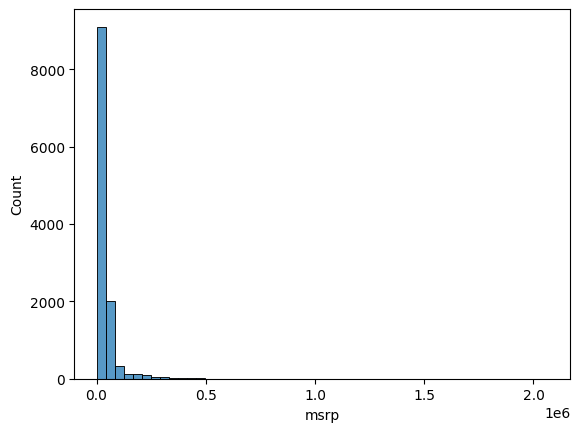

In [18]:
sns.histplot(rd.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

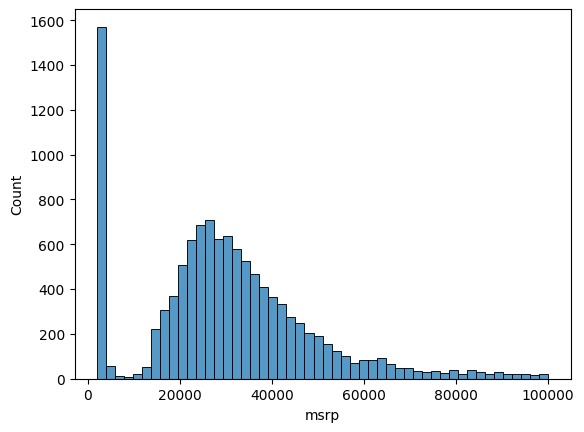

In [19]:
sns.histplot(rd.msrp[rd.msrp<100000], bins=50)

In [20]:
np.log1p([0,1,2,3,4,5,6,7,8,9])

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509])

In [21]:
np.log1p(rd.msrp)

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

In [22]:
log_prices = np.log1p(rd.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

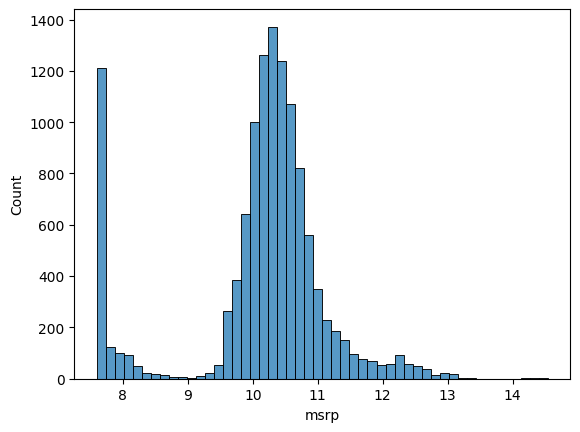

In [23]:
sns.histplot(log_prices, bins=50)

In [24]:
rd.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [25]:
n = len(rd)

In [26]:
val_len = int(n*.20)
test_len = int(n * .20)
train_len = n - val_len - test_len

In [27]:
val_len, test_len, train_len

(2382, 2382, 7150)

In [28]:
rd.iloc[[1,10,13,15]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
13,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,19,3916,37200
15,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,25,18,3916,48250


In [ ]:
df_train = rd.iloc[:train_len]
df_val = rd.iloc[train_len:train_len+val_len]
df_test = rd.iloc[train_len+val_len:]

In [ ]:
df_train

In [31]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


In [32]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9532,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,47575
9533,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,31940
9534,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,24,18,1385,38335
9535,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,35870
9536,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,24,18,1385,28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [33]:
ids = np.arange(n)

In [34]:
ids

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [35]:
np.random.seed(2)
np.random.shuffle(ids)

In [36]:
ids

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [ ]:
df_train = rd.iloc[ids[:train_len]]
df_val = rd.iloc[ids[train_len:train_len+val_len]]
df_test = rd.iloc[ids[train_len+val_len:]]

In [38]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [39]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [40]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [41]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [43]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [44]:
y_df_train = np.log1p(df_train.msrp.values)
y_df_val = np.log1p(df_val.msrp.values)
y_df_test = np.log1p(df_test.msrp.values)

In [45]:
y_df_train, y_df_val, y_df_test

(array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
        12.62248099, 10.54061978], shape=(7150,)),
 array([10.19936098, 10.90872279,  9.72770457, ..., 11.21756062,
         9.77542688, 10.1924563 ], shape=(2382,)),
 array([ 7.60140233,  8.07464908, 10.34563811, ..., 10.27852782,
        10.00789261, 10.40414162], shape=(2382,)))

In [46]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [47]:
len(df_train)

7150

In [48]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [49]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [51]:
xi = [310, 18, 1624]

In [52]:
xi

[310, 18, 1624]

In [53]:
wo=7.17
w = [0.01, 0.02, 0.004]

In [54]:
def linear_regresion(xi):
    n= len(xi)
    
    pred = 7.17

    for j in range(n):
        pred = pred + xi[j] * w[j] 

    return pred

In [55]:
linear_regresion(xi)

17.125999999999998

In [56]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [57]:
linear_regresion(xi)

12.312

In [58]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [59]:
np.log1p(222347.2221101062)

np.float64(12.312)

In [60]:
# return dot product of feature matrix and weigh
def dot(X, W):
    n = len(X)

    prod = 0.0

    for j in range(n):
        prod = prod + X[j] * W[j]

    return prod

In [61]:
def linear_regresion(xi):
    return w0+ dot(xi, w)

In [62]:
linear_regresion(xi)

12.312000000000001

In [63]:
w_new = [w0] + w

In [64]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [65]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [66]:
def linear_regresion(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [67]:
linear_regresion(xi)

12.312

In [68]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [69]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
x  = [x1, x2, x10]
x = np.array(x)


In [70]:
def linear_regresion(X):
    return x.dot(w_new)

In [151]:
linear_regresion(x)

array([12.38 , 13.552, 12.312])

In [71]:
def train_linear_regression(X,y):
    pass

In [72]:
train_linear_regression(1,2)

In [73]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

In [77]:
X = np.array(X)

In [78]:
ones = np.ones(X.shape[0])

In [79]:
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [80]:
X = np.column_stack([ones, X])

In [81]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [82]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [83]:
X.T.dot(X)

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [84]:
X.T

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00],
       [1.480e+02, 1.320e+02, 4.530e+02, 1.580e+02, 1.720e+02, 4.130e+02,
        3.800e+01, 1.420e+02, 4.530e+02],
       [2.400e+01, 2.500e+01, 1.100e+01, 2.400e+01, 2.500e+01, 1.100e+01,
        5.400e+01, 2.500e+01, 3.100e+01],
       [1.385e+03, 2.031e+03, 8.600e+01, 1.850e+02, 2.010e+02, 8.600e+01,
        1.850e+02, 4.310e+02, 8.600e+01]])

In [85]:
gram_matrix = X.T.dot(X)

In [86]:
gram_matrix

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [87]:
gram_matrix_inverse = np.linalg.inv(gram_matrix)

In [88]:
gram_matrix_inverse

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [89]:
chk_idn = gram_matrix.dot(gram_matrix_inverse)

In [90]:
chk_idn

array([[ 1.00000000e+00, -3.46944695e-18,  2.77555756e-17,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.42108547e-14,
        -2.22044605e-16],
       [-1.13686838e-13,  0.00000000e+00,  1.00000000e+00,
         1.38777878e-17],
       [-9.09494702e-13, -1.77635684e-15,  5.68434189e-14,
         1.00000000e+00]])

In [91]:
chk_idn.round()

array([[ 1., -0.,  0.,  0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [92]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [93]:
X, y

(array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
        [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
        [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
        [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
        [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
        [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
        [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
        [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
        [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]]),
 [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000])

In [94]:
w_full= gram_matrix_inverse.dot(X.T).dot(y)

In [95]:
w0= w_full[0]
w = w_full[1:]

In [96]:
w0, w

(np.float64(25844.75405576684),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [97]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)

In [108]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    gram_matrix = X.T.dot(X)
    gram_matrix_inverse = np.linalg.inv(gram_matrix)
    w_full= gram_matrix_inverse.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [109]:
train_linear_regression(X, y)

(np.float64(25844.75405576684),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [110]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [111]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [112]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [113]:
base = ['engine_hp', 'engine_cylinders', 'city_mpg', 'highway_mpg', 'popularity']
base

['engine_hp', 'engine_cylinders', 'city_mpg', 'highway_mpg', 'popularity']

In [114]:
df_train[base]

,engine_hp,engine_cylinders,city_mpg,highway_mpg,popularity
0,148.0,4.0,24,33,1385
1,132.0,4.0,25,32,2031
2,148.0,4.0,28,37,640
3,90.0,4.0,16,18,873
4,385.0,8.0,15,21,5657
...,...,...,...,...,...
7145,300.0,6.0,20,31,3916
7146,210.0,4.0,24,30,873
7147,285.0,6.0,17,22,549
7148,563.0,12.0,13,21,86


In [115]:
x_train = df_train[base].fillna(0).values

In [116]:
y_train = y_df_train

In [107]:
w0, w = train_linear_regression(x_train, y_train)

In [117]:
w0, w

(np.float64(7.9272573880698936),
 array([ 9.70589522e-03, -1.59103494e-01,  1.49441072e-02,  1.43792133e-02,
        -9.06908672e-06]))

In [118]:
y_pred = w0+ x_train.dot(w)

In [119]:
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

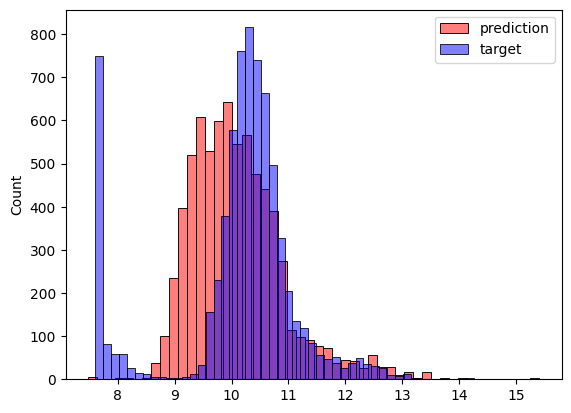

In [120]:
sns.histplot(y_pred, color='red', bins=50, alpha=.5, label='prediction')
sns.histplot(y_train, color='blue', bins=50, alpha=.5, label='target')
plt.legend()

In [121]:
def rmse(y_train, y_pred):
    #print(y_train, y_pred)
    error = y_train - y_pred
    sqr = error ** 2
    avg = sqr.mean()
    return np.sqrt(avg)

In [125]:
rmse(y_df_train, y_pred)

np.float64(0.7554192603920132)

In [133]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
df_train